In [30]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import math

In [3]:
filename="train.csv"
filename2="test.csv"
data=pd.read_csv(filename, delimiter=',')
data2=pd.read_csv(filename2,delimiter=',')
data

,1,2,3,4,5,6,7,8,Target
0,1,0.350,0.260,0.095,0.2110,0.0860,0.0560,0.0680,7
1,1,0.275,0.200,0.065,0.1035,0.0475,0.0205,0.0300,7
2,1,0.595,0.475,0.155,0.9840,0.4865,0.1840,0.2755,10
3,2,0.670,0.550,0.170,1.2470,0.4720,0.2455,0.4000,21
4,2,0.645,0.510,0.190,1.4745,0.6050,0.3450,0.4800,9
...,...,...,...,...,...,...,...,...,...
2918,1,0.550,0.430,0.145,0.7120,0.3025,0.1520,0.2250,10
2919,0,0.580,0.435,0.150,0.8390,0.3485,0.2070,0.1920,7
2920,0,0.650,0.500,0.165,1.1445,0.4850,0.2180,0.3650,12
2921,1,0.630,0.490,0.170,1.2170,0.5515,0.2120,0.3100,11


In [4]:
xarr = np.array(data)
X = data.iloc[:, :-1].values
y = data.iloc[:,-1:]


In [5]:
data.head()
xarr.shape
data.shape

(2923, 9)

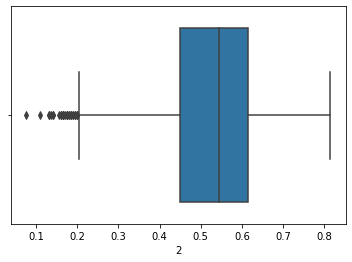

In [49]:

sns.boxplot(data=data,x=data['2'])

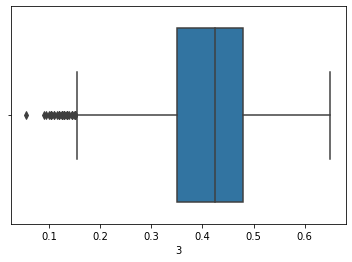

In [50]:

sns.boxplot(data=data,x=data['3'])

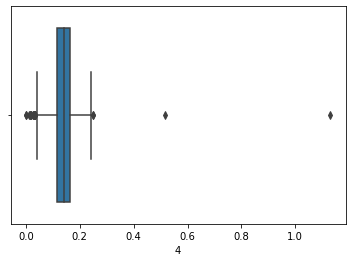

In [51]:

sns.boxplot(data=data,x=data['4'])

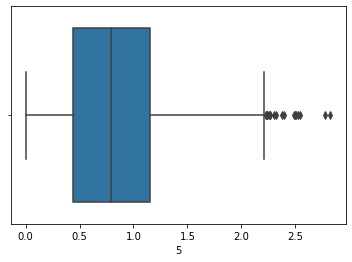

In [52]:

sns.boxplot(data=data,x=data['5'])

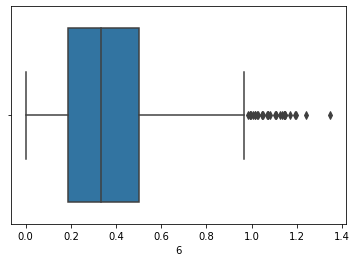

In [53]:
sns.boxplot(data=data,x=data['6'])

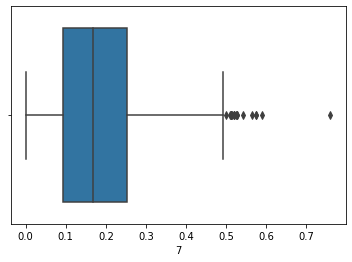

In [55]:
sns.boxplot(data=data,x=data['7'])

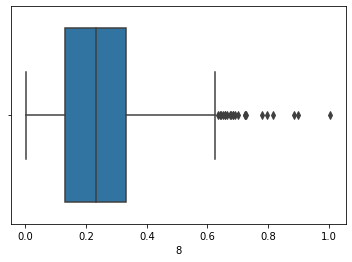

In [56]:
sns.boxplot(data=data,x=data['8'])

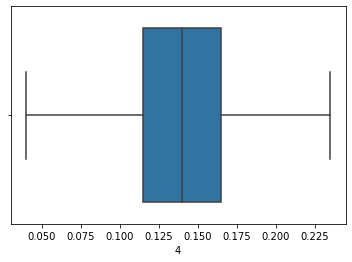

In [81]:
sns.boxplot(data=newdata,x=newdata['4'])
#data without outliers

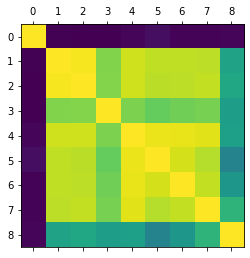

In [8]:
plt.matshow(data.corr())
plt.show()

In [6]:
z=np.abs(stats.zscore(X))
print(z)
filtr=(z<2.5).all(axis=1)
newdata=data[filtr]
print(newdata)
#new data without outliers


[[0.06207032 1.45311106 1.49881921 ... 1.24046161 1.13225643 1.22723472]
 [0.06207032 2.08055864 2.10861093 ... 1.41632533 1.45606742 1.50143362]
 [0.06207032 0.59655103 0.68626776 ... 0.58897796 0.03528745 0.27003558]
 ...
 [1.27973164 1.05667925 0.94034764 ... 0.58212612 0.34541629 0.91584614]
 [0.06207032 0.8893599  0.83871569 ... 0.88589074 0.29068767 0.51897932]
 [0.06207032 0.86749332 0.8890275  ... 0.83620343 1.18698505 1.03601707]]
      1      2      3      4       5       6       7       8  Target
0     1  0.350  0.260  0.095  0.2110  0.0860  0.0560  0.0680       7
1     1  0.275  0.200  0.065  0.1035  0.0475  0.0205  0.0300       7
2     1  0.595  0.475  0.155  0.9840  0.4865  0.1840  0.2755      10
3     2  0.670  0.550  0.170  1.2470  0.4720  0.2455  0.4000      21
4     2  0.645  0.510  0.190  1.4745  0.6050  0.3450  0.4800       9
...  ..    ...    ...    ...     ...     ...     ...     ...     ...
2918  1  0.550  0.430  0.145  0.7120  0.3025  0.1520  0.2250      10
2919

In [7]:
newdata[newdata.notnull()]

,1,2,3,4,5,6,7,8,Target
0,1,0.350,0.260,0.095,0.2110,0.0860,0.0560,0.0680,7
1,1,0.275,0.200,0.065,0.1035,0.0475,0.0205,0.0300,7
2,1,0.595,0.475,0.155,0.9840,0.4865,0.1840,0.2755,10
3,2,0.670,0.550,0.170,1.2470,0.4720,0.2455,0.4000,21
4,2,0.645,0.510,0.190,1.4745,0.6050,0.3450,0.4800,9
...,...,...,...,...,...,...,...,...,...
2918,1,0.550,0.430,0.145,0.7120,0.3025,0.1520,0.2250,10
2919,0,0.580,0.435,0.150,0.8390,0.3485,0.2070,0.1920,7
2920,0,0.650,0.500,0.165,1.1445,0.4850,0.2180,0.3650,12
2921,1,0.630,0.490,0.170,1.2170,0.5515,0.2120,0.3100,11


In [8]:
newx = newdata.iloc[:, :-1].values
newy= newdata.iloc[:,-1:]
newy

,Target
0,7
1,7
2,10
3,21
4,9
...,...
2918,10
2919,7
2920,12
2921,11


In [41]:
def traintest():
    return train_test_split(newx,newy, test_size=0.20, random_state=0)

x_train, x_test, y_train, y_test = traintest()
traintest()
x_train
y_train=np.array(y_train)
len(x_train),len(x_test)
x_test
x_train

array([[1.    , 0.315 , 0.235 , ..., 0.08  , 0.045 , 0.047 ],
       [1.    , 0.36  , 0.28  , ..., 0.0885, 0.04  , 0.09  ],
       [1.    , 0.375 , 0.275 , ..., 0.095 , 0.0545, 0.066 ],
       ...,
       [1.    , 0.615 , 0.49  , ..., 0.4145, 0.195 , 0.345 ],
       [2.    , 0.35  , 0.255 , ..., 0.0705, 0.0385, 0.06  ],
       [2.    , 0.51  , 0.415 , ..., 0.3295, 0.1835, 0.203 ]])

In [10]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
predSVC = clf.predict(x_test)
predSVC

C:\Users\User\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([ 8, 10,  7,  9,  8,  8,  8,  7,  8,  7,  7,  9, 10, 10,  7,  5,  8,
        9,  8,  9,  7, 10,  9, 10, 10, 10,  8,  7,  9, 10,  8,  5, 10,  9,
        9,  7, 10,  8,  7, 10,  9,  9,  7,  9,  9,  9,  7, 10,  9, 10,  8,
       10,  8,  7,  9, 10, 10,  7,  8,  9,  8, 10, 10,  8,  8,  9, 10,  9,
        7,  7,  7,  9, 10, 10,  9,  9, 10,  9,  8, 10, 10, 10, 10, 10,  9,
       10, 10,  9,  8,  9, 10,  7, 10,  7, 10, 10,  9,  8,  7,  9, 10, 10,
        8,  7,  5,  9,  7,  7,  9,  9, 10,  8,  9,  9,  7,  8,  9,  7,  7,
        7,  9, 10, 10,  9,  8,  9,  9,  9,  8,  9,  9,  9,  7, 10,  8,  8,
        8,  7,  7,  7,  9, 10,  9,  7, 10, 10, 10,  7,  7,  8,  9, 10, 10,
        7,  8,  9,  7,  7,  8,  7,  7, 10,  9, 10,  7,  8,  7, 10,  9,  9,
        9, 10,  7,  7,  8,  7,  7,  9,  7,  7, 10,  9,  9,  8,  9,  7,  7,
       10, 10,  7,  9,  7,  8, 10,  7,  9,  9,  7, 10,  7, 10, 10,  9,  8,
       10, 10,  7, 10,  7, 10,  8,  9,  7,  9,  8,  7,  9, 10,  8,  8,  7,
        9, 10,  8,  9, 10

In [11]:
accSVC=accuracy_score(y_test,predSVC)
accSVC*100

23.381294964028775

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_test=np.array(y_test)


,Target
1193,8
859,17
2874,6
129,8
663,18
...,...
459,9
2150,8
2478,8
1849,10


In [35]:
tree = DecisionTreeClassifier()
tree = tree.fit(x_train,y_train)
pred = tree.predict(x_test)
MSE = mean_squared_error(pred,y_test)
RMSE = math.sqrt(MSE)
print("tree rmse")
print(RMSE)

MSE2 = mean_squared_error(y_pred,y_test)
RMSE2 = math.sqrt(MSE2)
print("linear rmse")
print(RMSE2)

tree rmse
2.8211049419554
linear rmse
1.9727375406759589


In [32]:
#thats why i should use less error model 
#it it linear regression


Accuracy 0.1960431654676259


,1,2,3,4,5,6,7,8
0,2,0.470,0.360,0.135,0.5010,0.1665,0.1150,0.1650
1,0,0.620,0.475,0.160,1.3245,0.6865,0.2330,0.3275
2,2,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975
3,1,0.455,0.345,0.110,0.4340,0.2070,0.0855,0.1215
4,1,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095
...,...,...,...,...,...,...,...,...
1249,1,0.490,0.380,0.120,0.5290,0.2165,0.1390,0.1550
1250,0,0.495,0.385,0.130,0.6905,0.3125,0.1790,0.1750
1251,2,0.370,0.280,0.105,0.2340,0.0905,0.0585,0.0750
1252,1,0.455,0.370,0.125,0.4330,0.2010,0.1265,0.1450


In [44]:
pp = model.predict(data2)

In [45]:
pp

array([[10.57704235],
       [ 8.62656253],
       [ 7.04971555],
       ...,
       [ 8.12703642],
       [ 8.81952222],
       [ 8.53766372]])

In [52]:
df=pd.DataFrame(pp)
df.to_csv(r'C:\Users\User\Documents\ML\submission.csv',index=True, header=True)

In [ ]:
#linear model
model2=lm()